In [1]:
#Importing related Python libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Load the Titanic dataset
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

Understand different features in the training dataset.

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
#To check the no of rows and columns present in the dataset
train_data.shape


(891, 12)

In [5]:

train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

Preprocess the data
Remove unnecessary columns

In [6]:
# Remove unnecessary columns
train_data = train_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
test_data = test_data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)


In [7]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [8]:
#To check the null values
feat_list = list(train_data.columns.values)

for feat in feat_list:
    print (feat,": ",sum(pd.isnull(train_data[feat])))

Survived :  0
Pclass :  0
Sex :  0
Age :  177
SibSp :  0
Parch :  0
Fare :  0
Embarked :  2


Fill missing values

In [9]:

train_data['Age'] = train_data['Age'].fillna(train_data['Age'].median())
train_data['Embarked'] = train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])


In [10]:
train_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [11]:
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].median())
test_data['Embarked'] = test_data['Embarked'].fillna(test_data['Embarked'].mode()[0])
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].median())

In [12]:
test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S
...,...,...,...,...,...,...,...
413,3,male,27.0,0,0,8.0500,S
414,1,female,39.0,0,0,108.9000,C
415,3,male,38.5,0,0,7.2500,S
416,3,male,27.0,0,0,8.0500,S


In [13]:
#Again checking the null values
feat_list = list(train_data.columns.values)

for feat in feat_list:
    print (feat,": ",sum(pd.isnull(train_data[feat])))
    

Survived :  0
Pclass :  0
Sex :  0
Age :  0
SibSp :  0
Parch :  0
Fare :  0
Embarked :  0


Convert categorical variables to numerical

In [14]:
train_data['Sex'] = train_data['Sex'].map({'female': 0, 'male': 1}).astype(int)
train_data['Embarked'] = train_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)

In [15]:
train_data.dtypes

Survived      int64
Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

In [16]:
test_data['Sex'] = test_data['Sex'].map({'female': 0, 'male': 1}).astype(int)
test_data['Embarked'] = test_data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)


In [17]:
test_data.dtypes

Pclass        int64
Sex           int32
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked      int32
dtype: object

Visualize features of the training dataset

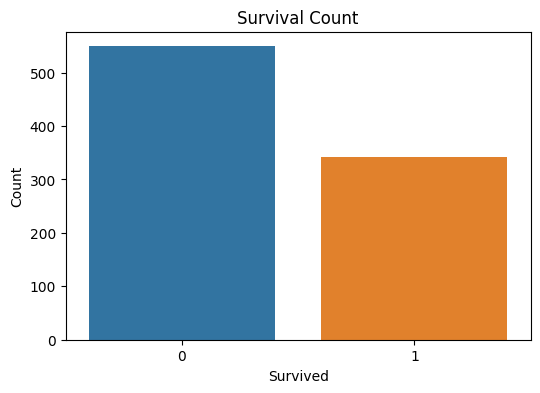

In [18]:
# Visualize survival count
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', data=train_data)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Count')
plt.show()


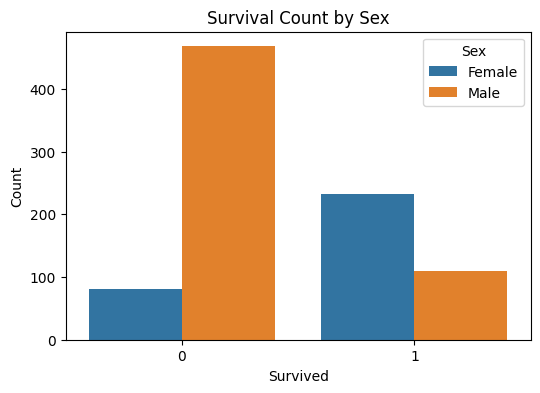

In [19]:
# Visualize survival count based on sex
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', hue='Sex', data=train_data)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Count by Sex')
plt.legend(title='Sex', labels=['Female', 'Male'])
plt.show()

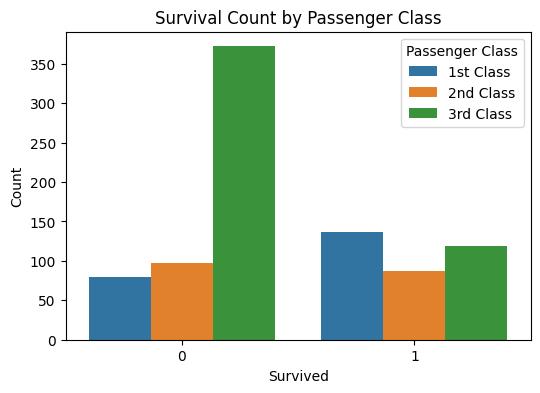

In [20]:
# Visualize survival count based on passenger class
plt.figure(figsize=(6, 4))
sns.countplot(x='Survived', hue='Pclass', data=train_data)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Count by Passenger Class')
plt.legend(title='Passenger Class', labels=['1st Class', '2nd Class', '3rd Class'])
plt.show()

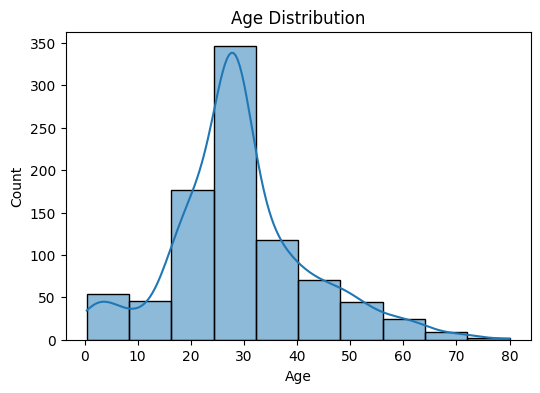

In [21]:
# Visualize age distribution of passengers
plt.figure(figsize=(6, 4))
sns.histplot(train_data['Age'].dropna(), bins=10, kde=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()


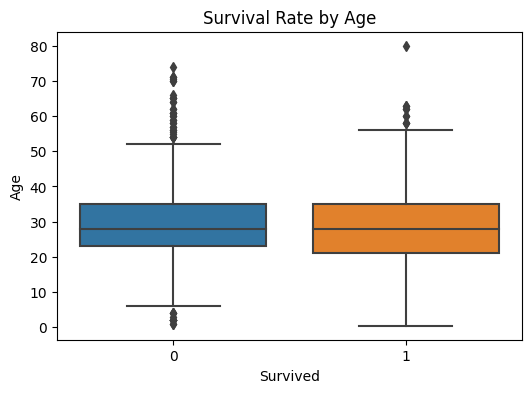

In [22]:
# Visualize survival rate by age
plt.figure(figsize=(6, 4))
sns.boxplot(x='Survived', y='Age', data=train_data)
plt.xlabel('Survived')
plt.ylabel('Age')
plt.title('Survival Rate by Age')
plt.show()

Split features and target


In [23]:
x_train = train_data.drop('Survived', axis=1).values
y_train = train_data['Survived'].values
x_test = test_data.values

 Normalize features

In [24]:
x_train = (x_train - np.mean(x_train, axis=0)) / np.std(x_train, axis=0)
x_test = (x_test - np.mean(x_test, axis=0)) / np.std(x_test, axis=0)

Implementing KNN Algorithm

In [25]:
def knn(x_train, y_train, x_test, k):
    predictions = []
    for i in range(len(x_test)):
        distances = np.sqrt(np.sum(np.square(x_train - x_test[i]), axis=1))
        nearest_neighbors = np.argsort(distances)[:k]
        labels = y_train[nearest_neighbors]
        unique_labels, counts = np.unique(labels, return_counts=True)
        predicted_label = unique_labels[np.argmax(counts)]
        predictions.append(predicted_label)
    return predictions

In [26]:
# Define the value of K
k = 10

# Run the KNN algorithm
predictions = knn(x_train, y_train, x_test, k)

# Generate submission file for Kaggle
submission = pd.DataFrame({'PassengerId': test_data.index + 892, 'Survived': predictions})
submission.to_csv('KNNPrediction.csv', index=False)

In [27]:
prediction= knn(x_train, y_train, x_train, k)

# Calculate accuracy
accuracy = np.mean(prediction== y_train)
print("Accuracy:", accuracy)

Accuracy: 0.8305274971941639


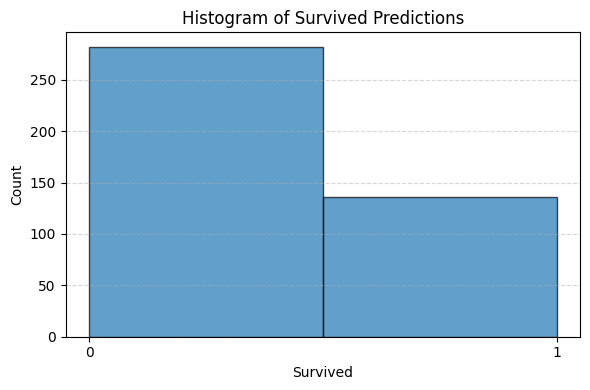

In [28]:
plt.figure(figsize=(6, 4))
plt.hist(predictions, bins=[0, 0.5, 1], edgecolor='black', alpha=0.7)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Histogram of Survived Predictions')
plt.xticks([0, 1])
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()